In [1]:
import torch
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

corr=[[1.,0.62212401,0.8097277,0.70612012,0.84892105,0.71424486,0.75599515,0.70253284,0.78280059,0.68888807],
     [0.62212401,1.,0.69801487,0.58368914,0.59453189,0.69003934,0.49796984,0.4487036,0.67863355,0.52330514],
     [0.8097277,0.69801487,1.,0.78292361,0.85682371,0.84688721,0.81003685,0.742196,0.78542605,0.76253406],
     [0.70612012,0.58368914,0.78292361,1.,0.84865856,0.82236201,0.80394491,0.67150976,0.80196065,0.78549084],
     [0.84892105,0.59453189,0.85682371,0.84865856,1.,0.79044781,0.90307991,0.82454896,0.81604276,0.81445171],
     [0.71424486,0.69003934,0.84688721,0.82236201,0.79044781,1.,0.77039554,0.68465192,0.85206682,0.74606611],
     [0.75599515,0.49796984,0.81003685,0.80394491,0.90307991,0.77039554,1.,0.90547683,0.79772699,0.88917127],
     [0.70253284,0.4487036,0.742196,0.67150976,0.82454896,0.68465192,0.90547683,1.,0.76207209,0.87118066],
     [0.78280059,0.67863355,0.78542605,0.80196065,0.81604276,0.85206682,0.79772699,0.76207209,1.,0.82626393],
     [0.68888807,0.52330514,0.76253406,0.78549084,0.81445171,0.74606611,0.88917127,0.87118066,0.82626393,1.]]
corr=np.array(corr)
adj=[[1,1,0,0,0,0,0,0,0,0],
     [1,1,1,0,0,0,0,0,0,0],
    [0,1,1,1,1,0,0,0,0,0],
    [0,0,1,1,1,1,1,0,0,0],
    [0,0,1,1,1,0,1,1,0,0],
    [0,0,0,1,0,1,1,1,1,0],
    [0,0,0,1,1,1,1,1,0,0],
    [0,0,0,0,1,1,1,1,1,1],
    [0,0,0,0,0,1,0,1,1,1],
    [0,0,0,0,0,0,0,1,1,1]]



C:\Users\hym\AppData\Local\Temp\ipykernel_85320\2423854854.py:20: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask=1 - np.tril(np.ones_like(corr, dtype=np.bool))  # 显示对脚线下面部分图


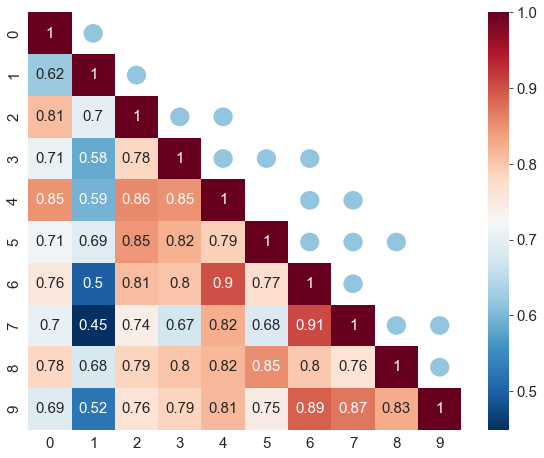

In [3]:
fontsize = 15
config = {
            "font.family": 'Arial',
            "font.size": fontsize,# 相当于小四大小
            "mathtext.fontset": 'stix',#matplotlib渲染数学字体时使用的字体，和Times New Roman差别不大
            "font.serif": ['SimSun'],#宋体
            'axes.unicode_minus': False # 处理负号，即-号
         }
rcParams.update(config)

fig, ax = plt.subplots(figsize=(8, 6.3), facecolor='w')
sns.heatmap(data=corr,
            vmax=1,
            annot=True,
            cmap='RdBu_r',
            fmt=".2g",
            #linewidths=1,
            #linecolor='gray',
             #annot_kws={'size':8,'weight':'normal', 'color':'#253D24'},
            mask=1 - np.tril(np.ones_like(corr, dtype=np.bool))  # 显示对脚线下面部分图
            )

# 添加圆点
n = 10
fill_radius = 0.18
for i in range(n):
    for j in range(i):
        if adj[i][j]:
            fill = plt.Circle((i+0.5, j+0.5), 0.2, color='#93c6de', fill=True, linewidth=2)
            #fill = plt.Rectangle((i + 0.5 - fill_radius, j + 0.5 - fill_radius), 2 * fill_radius, 2 * fill_radius,color='grey', fill=True, linewidth=2)
            ax.add_artist(fill)


plt.gcf().subplots_adjust(left=0.05, right=0.99, bottom=0.06, top=0.98)
plt.savefig('../fig/corr_map.svg',
            format='svg',
            dpi=600,
            transparent=True,#设置图片背景透明
            bbox_inches='tight')
plt.show()

In [22]:
n_agency=3

# us-region数据本来的机构划分是[[0, 1], [2, 3, 4, 5, 6], [7, 8, 9]]，
# 但是在可视化过程中将同一个机构的节点挨着放了
agency_list=[[0,1],[2,3,4,5,6],[7,8,9]]

corr_agency=np.zeros((n_agency,n_agency))
for i in range(n_agency):
    for j in range(n_agency):
        sub_corr = corr[np.ix_(agency_list[i],agency_list[j])]
        if i==j:
            t = len(agency_list[i])
            corr_agency[i,j] = (np.sum(sub_corr) - t)/ (t*(t-1))
        else:
            corr_agency[i,j] = np.mean(sub_corr)

print(corr_agency)

[[0.62212401 0.6899254  0.6374773 ]
 [0.6899254  0.82355601 0.79195472]
 [0.6374773  0.79195472 0.81983889]]


C:\Users\hym\AppData\Local\Temp\ipykernel_45176\841115514.py:19: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask=1 - np.triu(np.ones_like(corr_agency, dtype=np.bool))  # 显示对脚线下面部分图


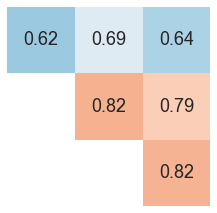

In [34]:
fontsize = 18
config = {
            "font.family": 'Arial',
            "font.size": fontsize,# 相当于小四大小
            "mathtext.fontset": 'stix',#matplotlib渲染数学字体时使用的字体，和Times New Roman差别不大
            "font.serif": ['SimSun'],#宋体
            'axes.unicode_minus': False # 处理负号，即-号
         }
rcParams.update(config)

fig, ax = plt.subplots(figsize=(3, 3), facecolor='w')
sns.heatmap(data=corr_agency,
            vmax=1,
            vmin=0.45,
            annot=True,
            cmap='RdBu_r',
            fmt=".2g",
            cbar=False,
            mask=1 - np.triu(np.ones_like(corr_agency, dtype=np.bool))  # 显示对脚线下面部分图
            )
ax.set_xticks([])
ax.set_yticks([])


plt.gcf().subplots_adjust(left=0.05, right=0.99, bottom=0.06, top=0.98)
# plt.savefig('../corr_map_sub.svg',
#             format='svg',
#             dpi=600,
#             transparent=True,#设置图片背景透明
#             bbox_inches='tight')
plt.show()